5.3.10
2.6.6


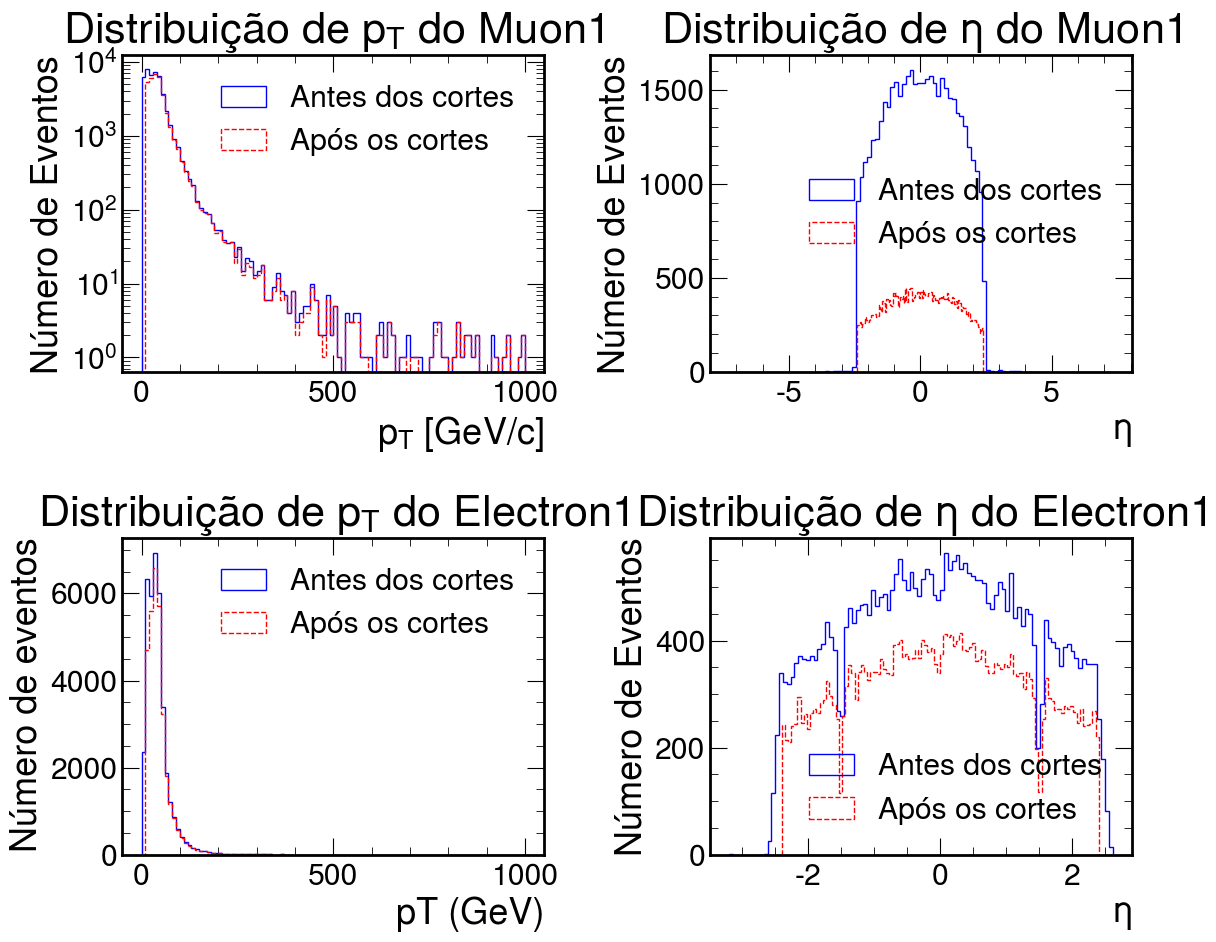

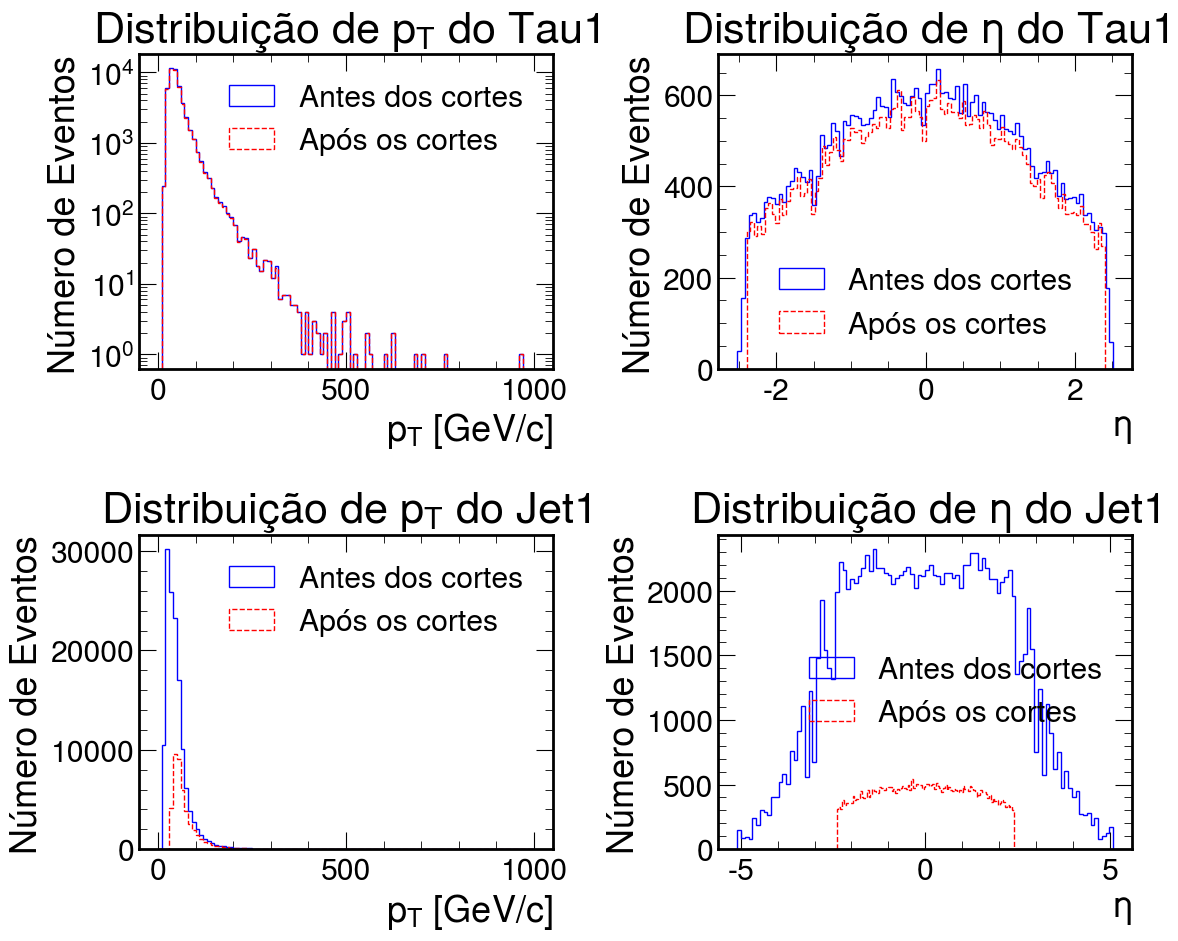

In [8]:
import uproot
import awkward as ak
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import vector
import hist
import mplhep as hep

print(uproot.__version__)
print(ak.__version__)

# Abrir o arquivo de dados
data = uproot.open("/opendata/eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/ZZTo4L_TuneCP5_13TeV_powheg_pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v1/2430000/051E9D22-4F30-8E49-8477-644E65768282.root")
data.keys()

# Verificar o conteúdo da árvore de eventos
tree = data['Events;1']

# Variáveis cinemáticas dos múons, elétrons, taús e jets
muon_pt = tree['Muon_pt'].array()
muon_eta = tree['Muon_eta'].array()
muon_phi = tree['Muon_phi'].array()
muon_mass = tree['Muon_mass'].array()

electron_pt = tree['Electron_pt'].array()
electron_eta = tree['Electron_eta'].array()
electron_phi = tree['Electron_phi'].array()
electron_mass = tree['Electron_mass'].array()

tau_pt = tree['Tau_pt'].array()
tau_eta = tree['Tau_eta'].array()
tau_phi = tree['Tau_phi'].array()
tau_mass = tree['Tau_mass'].array()

jet_pt = tree['Jet_pt'].array()
jet_eta = tree['Jet_eta'].array()
jet_phi = tree['Jet_phi'].array()
jet_mass = tree['Jet_mass'].array()

hlt_isomu24 = tree['HLT_IsoMu24'].array()
nmuon = tree['nMuon'].array()
nelectron = tree['nElectron'].array()
ntau = tree['nTau'].array()
njet = tree['nJet'].array()

# Seleção do trigger
cut_trigger = (hlt_isomu24 == True)

# Seleção de pt e eta para os muons
valid_events = ak.num(muon_pt) >= 2  # Garante que temos pelo menos 2 muons por evento

mask_mu1 = (muon_pt[valid_events][:, 0] > 12.0) & (np.abs(muon_eta[valid_events][:, 0]) < 2.4)
mask_mu2 = (muon_pt[valid_events][:, 1] > 4.0) & (np.abs(muon_eta[valid_events][:, 1]) < 2.4)

cut_cinematico_muons = mask_mu1 & mask_mu2

muon_pt_sel = muon_pt[valid_events][cut_cinematico_muons]
muon_eta_sel = muon_eta[valid_events][cut_cinematico_muons]

# Seleção de pt e eta para os elétrons
valid_events_elec = ak.num(electron_pt) >= 2
mask_elec = (electron_pt[valid_events_elec][:, 0] > 12.0) & (np.abs(electron_eta[valid_events_elec][:, 0]) < 2.4)
mask_elec2 = (electron_pt[valid_events_elec][:, 1] > 4.0) & (np.abs(electron_eta[valid_events_elec][:, 1]) < 2.4)

cut_cinematico_elec = mask_elec & mask_elec2

electron_pt_sel = electron_pt[valid_events_elec][cut_cinematico_elec]
electron_eta_sel = electron_eta[valid_events_elec][cut_cinematico_elec]

# Seleção de pt e eta para os taús
valid_events_tau = ak.num(tau_pt) >= 2
mask_tau = (tau_pt[valid_events_tau][:, 0] > 12.0) & (np.abs(tau_eta[valid_events_tau][:, 0]) < 2.4)
mask_tau2 = (tau_pt[valid_events_tau][:, 1] > 4.0) & (np.abs(tau_eta[valid_events_tau][:, 1]) < 2.4)

cut_cinematico_tau = mask_tau & mask_tau2

tau_pt_sel = tau_pt[valid_events_tau][cut_cinematico_tau]
tau_eta_sel = tau_eta[valid_events_tau][cut_cinematico_tau]

# Seleção de pt e eta para os jets
valid_events_jet = ak.num(jet_pt) >= 2
mask_jet = (jet_pt[valid_events_jet][:, 0] > 30.0) & (np.abs(jet_eta[valid_events_jet][:, 0]) < 2.4)
mask_jet2 = (jet_pt[valid_events_jet][:, 1] > 30.0) & (np.abs(jet_eta[valid_events_jet][:, 1]) < 2.4)

cut_cinematico_jet = mask_jet & mask_jet2

jet_pt_sel = jet_pt[valid_events_jet][cut_cinematico_jet]
jet_eta_sel = jet_eta[valid_events_jet][cut_cinematico_jet]

# Gerar os plots para cada partícula (múons, elétrons, taús, jets)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot para muon1
axes[0, 0].hist(muon_pt[valid_events][:, 0], bins=100, range=(0, 1000), histtype='step', color='blue', label='Antes dos cortes')
axes[0, 0].hist(muon_pt_sel[:, 0], bins=100, range=(0, 1000), histtype='step', color='red', linestyle='--', label='Após os cortes')
axes[0, 0].set_title('Distribuição de $p_T$ do Muon1')
axes[0, 0].set_xlabel(r'$p_T$ [GeV/c]')
axes[0, 0].set_ylabel('Número de Eventos')
axes[0, 0].set_yscale('log')
axes[0, 0].legend()

axes[0, 1].hist(muon_eta[valid_events][:, 0], bins=100, color='blue', histtype='step', label='Antes dos cortes')
axes[0, 1].hist(muon_eta_sel[:, 0], bins=100, color='red', histtype='step', linestyle='--', label='Após os cortes')
axes[0, 1].set_title('Distribuição de $\eta$ do Muon1')
axes[0, 1].set_xlabel(r'$\eta$')
axes[0, 1].set_ylabel('Número de Eventos')
axes[0, 1].legend()


# Plot para electron1
axes[1, 0].hist(electron_pt[valid_events_elec][:, 0], bins=100, range=(0, 1000), histtype='step', color='blue', label='Antes dos cortes')
axes[1, 0].hist(electron_pt_sel[:, 0], bins=100, range=(0, 1000), histtype='step', color='red', linestyle='--', label='Após os cortes')
axes[1, 0].set_title('Distribuição de $p_T$ do Electron1')
axes[1, 0].set_xlabel('pT (GeV)')
axes[1, 0].set_ylabel('Número de eventos')
axes[1, 0].legend()

axes[1, 1].hist(electron_eta[valid_events_elec][:, 0], bins=100, color='blue', histtype='step', label='Antes dos cortes')
axes[1, 1].hist(electron_eta_sel[:, 0], bins=100, color='red', histtype='step', linestyle='--', label='Após os cortes')
axes[1, 1].set_title('Distribuição de $\eta$ do Electron1')
axes[1, 1].set_xlabel(r'$\eta$')
axes[1, 1].set_ylabel('Número de Eventos')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('Mu_ele.png')
plt.show()

# Gerar os plots para Tau1 e Tau2
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot para tau1
axes[0, 0].hist(tau_pt[valid_events_tau][:, 0], bins=100, range=(0, 1000), histtype='step', color='blue', label='Antes dos cortes')
axes[0, 0].hist(tau_pt_sel[:, 0], bins=100, range=(0, 1000), histtype='step', color='red', linestyle='--', label='Após os cortes')
axes[0, 0].set_title('Distribuição de $p_T$ do Tau1')
axes[0, 0].set_xlabel(r'$p_T$ [GeV/c]')
axes[0, 0].set_ylabel('Número de Eventos')
axes[0, 0].set_yscale('log')
axes[0, 0].legend()

axes[0, 1].hist(tau_eta[valid_events_tau][:, 0], bins=100, color='blue', histtype='step', label='Antes dos cortes')
axes[0, 1].hist(tau_eta_sel[:, 0], bins=100, color='red', histtype='step', linestyle='--', label='Após os cortes')
axes[0, 1].set_title('Distribuição de $\eta$ do Tau1')
axes[0, 1].set_xlabel(r'$\eta$')
axes[0, 1].set_ylabel('Número de Eventos')
axes[0, 1].legend()

# Plot para jet1
axes[1, 0].hist(jet_pt[valid_events_jet][:, 0], bins=100, range=(0, 1000), histtype='step', color='blue', label='Antes dos cortes')
axes[1, 0].hist(jet_pt_sel[:, 0], bins=100, range=(0, 1000), histtype='step', color='red', linestyle='--', label='Após os cortes')
axes[1, 0].set_title('Distribuição de $p_T$ do Jet1')
axes[1, 0].set_xlabel(r'$p_T$ [GeV/c]')
axes[1, 0].set_ylabel('Número de Eventos')
axes[1, 0].legend()

axes[1, 1].hist(jet_eta[valid_events_jet][:, 0], bins=100, color='blue', histtype='step', label='Antes dos cortes')
axes[1, 1].hist(jet_eta_sel[:, 0], bins=100, color='red', histtype='step', linestyle='--', label='Após os cortes')
axes[1, 1].set_title('Distribuição de $\eta$ do Jet1')
axes[1, 1].set_xlabel(r'$\eta$')
axes[1, 1].set_ylabel('Número de Eventos')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('tau_jets.png')
plt.show()




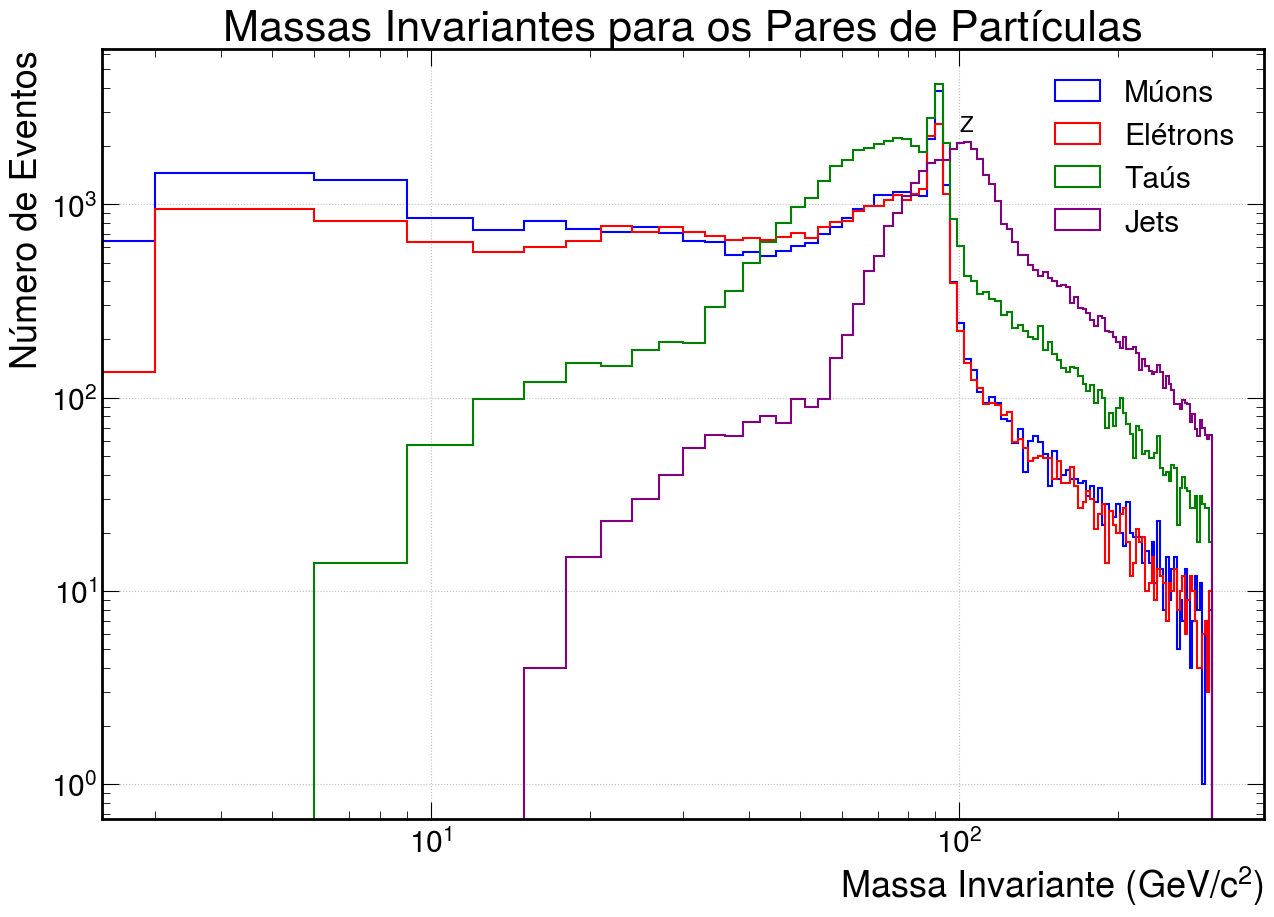

In [5]:
import uproot
import awkward as ak
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import vector
import mplhep as hep

# Abrir o arquivo de dados
data = uproot.open("/opendata/eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/ZZTo4L_TuneCP5_13TeV_powheg_pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v1/2430000/051E9D22-4F30-8E49-8477-644E65768282.root")
data.keys()

# Verificar o conteúdo da árvore de eventos
tree = data['Events;1']

# Variáveis cinemáticas dos múons, elétrons, taús e jets
muon_pt = tree['Muon_pt'].array()
muon_eta = tree['Muon_eta'].array()
muon_phi = tree['Muon_phi'].array()
muon_mass = tree['Muon_mass'].array()

electron_pt = tree['Electron_pt'].array()
electron_eta = tree['Electron_eta'].array()
electron_phi = tree['Electron_phi'].array()
electron_mass = tree['Electron_mass'].array()

tau_pt = tree['Tau_pt'].array()
tau_eta = tree['Tau_eta'].array()
tau_phi = tree['Tau_phi'].array()
tau_mass = tree['Tau_mass'].array()

jet_pt = tree['Jet_pt'].array()
jet_eta = tree['Jet_eta'].array()
jet_phi = tree['Jet_phi'].array()
jet_mass = tree['Jet_mass'].array()

hlt_isomu24 = tree['HLT_IsoMu24'].array()
nmuon = tree['nMuon'].array()
nelectron = tree['nElectron'].array()
ntau = tree['nTau'].array()
njet = tree['nJet'].array()

# Seleção do trigger
cut_trigger = (hlt_isomu24 == True)

# Seleção de pt e eta para os muons
valid_events = ak.num(muon_pt) >= 2  # Garante que temos pelo menos 2 muons por evento

mask_mu1 = (muon_pt[valid_events][:, 0] > 12.0) & (np.abs(muon_eta[valid_events][:, 0]) < 2.4)
mask_mu2 = (muon_pt[valid_events][:, 1] > 4.0) & (np.abs(muon_eta[valid_events][:, 1]) < 2.4)

cut_cinematico_muons = mask_mu1 & mask_mu2

muon_pt_sel = muon_pt[valid_events][cut_cinematico_muons]
muon_eta_sel = muon_eta[valid_events][cut_cinematico_muons]
muon_phi_sel = muon_phi[valid_events][cut_cinematico_muons]
muon_mass_sel = muon_mass[valid_events][cut_cinematico_muons]

# Criação dos quadri-vetores dos múons após os cortes
muon1_4vecs = vector.zip({
    "pt": muon_pt_sel[:, 0],
    "eta": muon_eta_sel[:, 0],
    "phi": muon_phi_sel[:, 0],
    "mass": muon_mass_sel[:, 0]
})

muon2_4vecs = vector.zip({
    "pt": muon_pt_sel[:, 1],
    "eta": muon_eta_sel[:, 1],
    "phi": muon_phi_sel[:, 1],
    "mass": muon_mass_sel[:, 1]
})

# Somar os 4-vetores do par de múons
dimuon = muon1_4vecs + muon2_4vecs
mass_dimu = dimuon.mass

# Seleção de pt e eta para os elétrons
valid_events_elec = ak.num(electron_pt) >= 2
mask_elec = (electron_pt[valid_events_elec][:, 0] > 12.0) & (np.abs(electron_eta[valid_events_elec][:, 0]) < 2.4)
mask_elec2 = (electron_pt[valid_events_elec][:, 1] > 4.0) & (np.abs(electron_eta[valid_events_elec][:, 1]) < 2.4)

cut_cinematico_elec = mask_elec & mask_elec2

electron_pt_sel = electron_pt[valid_events_elec][cut_cinematico_elec]
electron_eta_sel = electron_eta[valid_events_elec][cut_cinematico_elec]
electron_phi_sel = electron_phi[valid_events_elec][cut_cinematico_elec]
electron_mass_sel = electron_mass[valid_events_elec][cut_cinematico_elec]

# Criação dos quadri-vetores dos elétrons após os cortes
electron1_4vecs = vector.zip({
    "pt": electron_pt_sel[:, 0],
    "eta": electron_eta_sel[:, 0],
    "phi": electron_phi_sel[:, 0],
    "mass": electron_mass_sel[:, 0]
})

electron2_4vecs = vector.zip({
    "pt": electron_pt_sel[:, 1],
    "eta": electron_eta_sel[:, 1],
    "phi": electron_phi_sel[:, 1],
    "mass": electron_mass_sel[:, 1]
})

# Somar os 4-vetores do par de elétrons
dielectron = electron1_4vecs + electron2_4vecs
mass_dielectron = dielectron.mass

# Seleção de pt e eta para os taús
valid_events_tau = ak.num(tau_pt) >= 2
mask_tau = (tau_pt[valid_events_tau][:, 0] > 12.0) & (np.abs(tau_eta[valid_events_tau][:, 0]) < 2.4)
mask_tau2 = (tau_pt[valid_events_tau][:, 1] > 4.0) & (np.abs(tau_eta[valid_events_tau][:, 1]) < 2.4)

cut_cinematico_tau = mask_tau & mask_tau2

tau_pt_sel = tau_pt[valid_events_tau][cut_cinematico_tau]
tau_eta_sel = tau_eta[valid_events_tau][cut_cinematico_tau]
tau_phi_sel = tau_phi[valid_events_tau][cut_cinematico_tau]
tau_mass_sel = tau_mass[valid_events_tau][cut_cinematico_tau]

# Criação dos quatro-vetores dos taús após os cortes
tau1_4vecs = vector.zip({
    "pt": tau_pt_sel[:, 0],
    "eta": tau_eta_sel[:, 0],
    "phi": tau_phi_sel[:, 0],
    "mass": tau_mass_sel[:, 0]
})

tau2_4vecs = vector.zip({
    "pt": tau_pt_sel[:, 1],
    "eta": tau_eta_sel[:, 1],
    "phi": tau_phi_sel[:, 1],
    "mass": tau_mass_sel[:, 1]
})

# Somar os 4-vetores do par de taús
ditau = tau1_4vecs + tau2_4vecs
mass_ditau = ditau.mass

# Seleção de pt e eta para os jets
valid_events_jet = ak.num(jet_pt) >= 2
mask_jet = (jet_pt[valid_events_jet][:, 0] > 30.0) & (np.abs(jet_eta[valid_events_jet][:, 0]) < 2.4)
mask_jet2 = (jet_pt[valid_events_jet][:, 1] > 30.0) & (np.abs(jet_eta[valid_events_jet][:, 1]) < 2.4)

cut_cinematico_jet = mask_jet & mask_jet2

jet_pt_sel = jet_pt[valid_events_jet][cut_cinematico_jet]
jet_eta_sel = jet_eta[valid_events_jet][cut_cinematico_jet]
jet_phi_sel = jet_phi[valid_events_jet][cut_cinematico_jet]
jet_mass_sel = jet_mass[valid_events_jet][cut_cinematico_jet]

# Criação dos quadri-vetores dos jets após os cortes
jet1_4vecs = vector.zip({
    "pt": jet_pt_sel[:, 0],
    "eta": jet_eta_sel[:, 0],
    "phi": jet_phi_sel[:, 0],
    "mass": jet_mass_sel[:, 0]
})

jet2_4vecs = vector.zip({
    "pt": jet_pt_sel[:, 1],
    "eta": jet_eta_sel[:, 1],
    "phi": jet_phi_sel[:, 1],
    "mass": jet_mass_sel[:, 1]
})

# Somar os 4-vetores do par de jets
dijet = jet1_4vecs + jet2_4vecs
mass_dijet = dijet.mass

# Plotando as massas invariantes
plt.figure(figsize=(15, 10))
hep.style.use('CMS')

plt.hist(mass_dimu, bins=100, range=(0, 300), histtype='step', label='Múons', color='blue', linewidth=1.5)
plt.hist(mass_dielectron, bins=100, range=(0, 300), histtype='step', label='Elétrons', color='red', linewidth=1.5)
plt.hist(mass_ditau, bins=100, range=(0, 300), histtype='step', label='Taús', color='green', linewidth=1.5)
plt.hist(mass_dijet, bins=100, range=(0, 300), histtype='step', label='Jets', color='purple', linewidth=1.5)

plt.xlabel(r'Massa Invariante (GeV/$c^2$)')
plt.ylabel('Número de Eventos')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.title('Massas Invariantes para os Pares de Partículas')

plt.savefig('Inv-Mass.png', format='png')

plt.text(100.0, 2.4e3, r'$Z$', fontsize=16, color='black')

plt.show()


In [3]:
# Contando eventos antes e depois dos cortes
total_eventos = len(muon_pt)
valid_eventos_muons = len(muon_pt_sel)

print(f'Número total de eventos: {total_eventos}')
print(f'Número de eventos após os cortes para muons: {valid_eventos_muons}')

# Para verificar para outras partículas, faça o mesmo para electron_pt, tau_pt, etc.
valid_eventos_elec = len(electron_pt_sel)
valid_eventos_tau = len(tau_pt_sel)
valid_eventos_jet = len(jet_pt_sel)

print(f'Número de eventos após os cortes para elétrons: {valid_eventos_elec}')
print(f'Número de eventos após os cortes para taús: {valid_eventos_tau}')
print(f'Número de eventos após os cortes para jets: {valid_eventos_jet}')


Número total de eventos: 168000
Número de eventos após os cortes para muons: 35109
Número de eventos após os cortes para elétrons: 31863
Número de eventos após os cortes para taús: 45856
Número de eventos após os cortes para jets: 43491
